<a href="https://colab.research.google.com/github/Muluken1Walle/Suicide-Rates/blob/main/SuicideProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import pycountry
import geopandas



In [3]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 16.3 MB/s 
     |████████████████████████████████| 16.7 MB 205 kB/s 


In [4]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=f1dc54ff99973bd2066d43545c6c8469f5ad9343f4463f44be83a23958df2a89
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [6]:
df = pd.read_csv('/content/drive/MyDrive/master.csv')

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
object_cols = df.select_dtypes(include='object')
object_cols


,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


In [10]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [11]:
df=df.drop('HDI for year' ,axis=1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [12]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [13]:
#Rename the columns
df.rename(columns={"suicides/100k pop":"suicides_pop",
 " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
 "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [14]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [15]:
 # Select only object type columns 
object_cols = df.select_dtypes(include='object')
object_cols

,country,sex,age,country-year,gdp_for_year,generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,Uzbekistan2014,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,Uzbekistan2014,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,Uzbekistan2014,"63,067,077,179",Generation Z


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

In [18]:
df['country']= le.fit_transform(df['country'])
df[ 'sex']= le.fit_transform(df[ 'sex'])
df['age']= le.fit_transform(df['age'])
df['country-year']= le.fit_transform(df['country-year'])
df['generation']= le.fit_transform(df['generation'])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  int64  
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  int64  
 3   age             27820 non-null  int64  
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  int64  
 8   gdp_for_year    27820 non-null  int64  
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.3 MB


In [20]:
df.describe()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,gdp_for_year,gdp_per_capita,generation
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,49.275270,2001.258375,0.500000,2.502876,242.574407,1.844794e+06,12.816097,1160.036952,4.455810e+11,16866.464414,2.701869
std,29.372538,8.469055,0.500009,1.706730,902.047917,3.911779e+06,18.961511,670.104041,1.453610e+12,18887.576472,1.809836
min,0.000000,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,0.000000,4.691962e+07,251.000000,0.000000
25%,24.000000,1995.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,580.000000,8.985353e+09,3447.000000,1.000000
50%,47.000000,2002.000000,0.500000,3.000000,25.000000,4.301500e+05,5.990000,1160.000000,4.811469e+10,9372.000000,2.000000
75%,74.000000,2008.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,1740.000000,2.602024e+11,24874.000000,4.000000
max,100.000000,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,2320.000000,1.812071e+13,126352.000000,5.000000


In [21]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [22]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [23]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


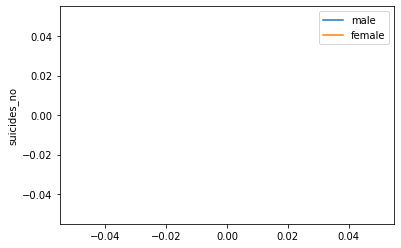

In [24]:
#The Factor of  of sex Suicide Rate.
#No matter which year it is, the suicides number of male are about three times higher than of female
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no)
sns.lineplot(df_women.year, df.suicides_no )
plt.legend(["male", 'female'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


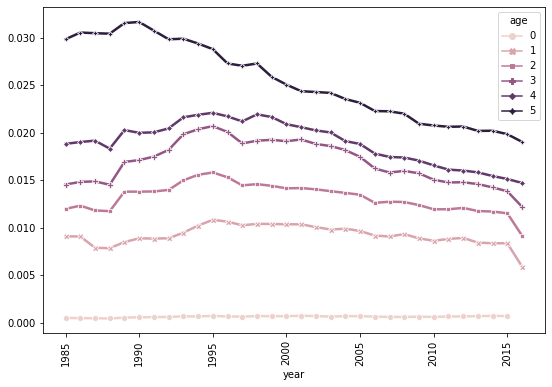

In [25]:
#The Factor of  of Age Suicide Rate.
#the suicide rate is getting higher when the age is higher. That is, age is a factor of suicide.
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

In [26]:
#We arange the country list and see how many countries are in the dataset, then calculate the suicide rate of countries.
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [27]:
#We'll map the suicide rate afterward, so we need to transfer the country name into country code. We choose alpha2 country code.
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

In [28]:
# name if the name in country list are not the same.
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [29]:
#We found that there are four country names are different, so we rename these names
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace('Czech Republic', "Czechia", inplace = True)
df.replace('Macau', 'Macao', inplace = True)
df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [30]:
#Before ploting the suicide rate of each countries, we calcuate the suicide rate for each year, and then take the average of number as rate.
df_SNo = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_SNo.sort_index(ascending=True)[:] * 100

In [31]:
df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

In [32]:
df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
0        1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [33]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

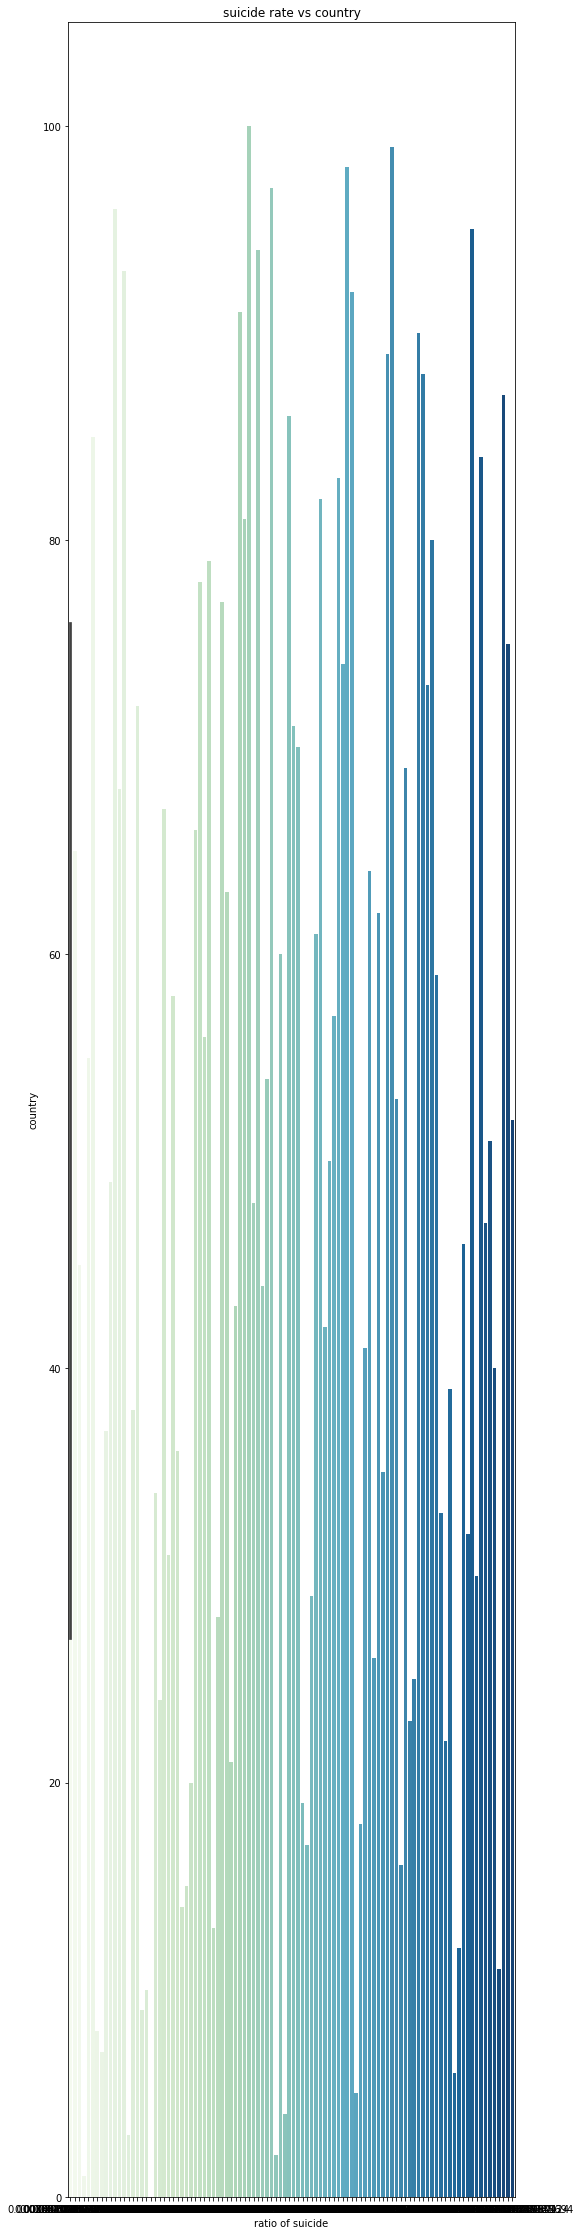

In [34]:
#plot the top 20 countries.
plt.figure(figsize=(8,40))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

In [35]:
new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

,iso_a3,suicide_rate
0,0,0.003137
1,1,0.000541
2,2,0.007911
3,3,0.002475
4,4,0.008097


In [36]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [37]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df.drop(['suicides_pop'],axis=1)
x

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,1,21,312900,0,2156624900,796,2
1,0,1987,1,3,16,308000,0,2156624900,796,5
2,0,1987,0,1,14,289700,0,2156624900,796,2
3,0,1987,1,5,1,21800,0,2156624900,796,1
4,0,1987,1,2,9,274300,0,2156624900,796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,3,107,3620833,2320,63067077179,2309,2
27816,100,2014,0,5,9,348465,2320,63067077179,2309,5
27817,100,2014,1,0,60,2762158,2320,63067077179,2309,3
27818,100,2014,0,0,44,2631600,2320,63067077179,2309,3


In [39]:
y=df['suicides_pop']
y

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: suicides_pop, Length: 27820, dtype: float64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year,gdp_per_capita,generation
2642,9,1985,0,4,0,8700,220,3651861702,9980,1
7131,25,1992,0,0,0,710300,594,34590052812,3573,4
3118,10,2008,0,2,0,19912,260,4607300000,17760,2
13879,47,2001,0,0,21,1455622,1157,22152694162,1608,4
26405,96,2005,1,4,3,104270,2203,180617018380,42196,5
...,...,...,...,...,...,...,...,...,...,...
1448,5,1986,1,0,18,1277100,120,181977476217,12288,2
6374,22,1995,0,4,99,544100,531,22387561845,4978,5
5041,18,1995,0,3,363,4287400,420,604031623433,21871,0
26242,95,2001,0,4,775,5837138,2189,38009344577,812,5


In [41]:
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LR= LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [54]:
pred = LR.predict(x_test)

In [55]:
 print('Mean Absolute Error of linear regression:',mean_absolute_error(pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(pred, y_test))
print('R_Squared Score of linear regression:', r2_score(pred, y_test))

Mean Absolute Error of linear regression: 9.470951824753834
Mean Square Error of linear regression: 228.32142429737831
R_Squared Score of linear regression: -0.8915245497926123


In [56]:
from sklearn.linear_model import Ridge #Ridge

ridge = Ridge()
ridge

Ridge()

In [57]:
ridge.fit(x_train,y_train)
ridge_score = ridge.score(x_test,y_test)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.09785e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


array([-5.09741683e-01, -9.31584015e-02,  1.30027875e+01,  3.60409392e+00,
        6.90962378e-03, -9.36987469e-07,  2.37042204e-02,  2.75272569e-13,
       -1.14857734e-06, -3.02070525e-01])

In [58]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.3521654855216041
number of feature used: 10


In [59]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [60]:
lasso.fit(x_train,y_train)
lasso_score = lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([-0.00000000e+00, -7.35920285e-02,  8.79046395e+00,  3.21703408e+00,
        7.66889252e-03, -1.06199212e-06,  1.34486673e-03,  2.96148273e-13,
       -9.40852530e-07, -0.00000000e+00])

In [61]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.3388772521438175
number of feature used: 8
